# Frontal Detection Analysis (front crossing rates)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
cesm_file_path = "/glade/work/kdagon/FrontDetector/CESMOutputs/"

In [3]:
#fronts_file = "cesm_fronts_2000-2005.nc"
#onehot_file = "cesm_frontsOneHot_2000-2005.nc"
cesm_hist_rates_file = "cesm_frontRates_2000-2005.nc"
#rates_file_viaPoly = "cesm_fronts_2000-2005_frontRates_viaPolylines.nc"

## Read in front rates file

In [4]:
#rates_fronts = xr.open_dataset(file_path+rates_file_viaPoly)
cesm_hist_rates_fronts = xr.open_dataset(cesm_file_path+cesm_hist_rates_file)

In [5]:
cesm_hist_rates_fronts

<xarray.Dataset>
Dimensions:                          (bnds: 2, front: 5, lat: 68, lon: 141, months: 72, months12: 12, seasons: 25, seasons4: 4, total: 1, years: 6)
Coordinates:
  * lat                              (lat) float64 10.0 11.0 12.0 ... 76.0 77.0
  * lon                              (lon) float64 189.0 190.0 ... 328.0 329.0
  * months                           (months) object 2000-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_months                      (months12) object ...
  * seasons                          (seasons) object 2000-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_seasons                     (seasons4) object ...
  * years                            (years) object 2000-07-15 00:00:00 ... 2005-07-15 00:00:00
    front_type                       (front) object ...
Dimensions without coordinates: bnds, front, months12, seasons4, total
Data variables:
    month_bounds                     (months, bnds) object ...
    clim_month_bounds                (months12, 

In [97]:
# seasonal centers? i.e., DJF center is Jan 15?
cesm_hist_rates_fronts.clim_seasons

<xarray.DataArray 'clim_seasons' (seasons4: 4)>
array([cftime.DatetimeNoLeap(2003, 1, 15, 0, 0, 0, 0, 1, 15),
       cftime.DatetimeNoLeap(2003, 4, 15, 0, 0, 0, 0, 0, 105),
       cftime.DatetimeNoLeap(2003, 7, 15, 0, 0, 0, 0, 0, 196),
       cftime.DatetimeNoLeap(2003, 10, 15, 0, 0, 0, 0, 1, 288)], dtype=object)
Coordinates:
    clim_seasons  (seasons4) object 2003-01-15 00:00:00 ... 2003-10-15 00:00:00
Dimensions without coordinates: seasons4
Attributes:
    axis:           T
    long_name:      climatology seasons
    standard_name:  time
    climatology:    clim_season_bounds

In [31]:
# last front index is "all"
cesm_hist_rates_fronts.front_type

<xarray.DataArray 'front_type' (front: 5)>
array(['cold', 'warm', 'stationary', 'occluded', 'all'], dtype=object)
Coordinates:
    front_type  (front) object 'cold' 'warm' 'stationary' 'occluded' 'all'
Dimensions without coordinates: front
Attributes:
    long_name:  kind of front

In [6]:
cesm_hist_srates_clim = cesm_hist_rates_fronts.seasonal_rate_climatology

In [7]:
# approx. lat/lon here to get a CONUS rectangular region - may not exactly match Jim's analysis
cesm_hist_srates_clim_CONUS = cesm_hist_srates_clim.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
#srates_clim_CONUS = srates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons

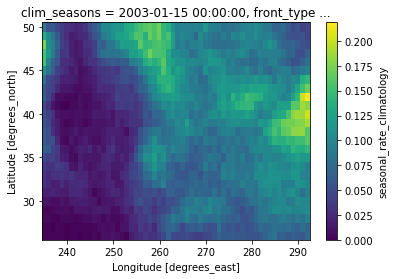

In [37]:
# how different is the sum of the front types versus the 'all' front type?
diffcheck = cesm_hist_srates_clim_CONUS[:,:4,:,:].sum('front') - cesm_hist_srates_clim_CONUS[:,4,:,:]
diffcheck[0,:,:].plot();

In [8]:
cesm_hist_srates_clim_CONUS_mean_wk = cesm_hist_srates_clim_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

In [9]:
# DJF rates across front types
#plt.bar(srates_clim_CONUS_mean_wk.front, srates_clim_CONUS_mean_wk[0]);

In [10]:
# cold front rates across seasons
#srates_clim_CONUS_mean_wk[:,0]

In [11]:
# sum along front types (leaving all type out)
#srates_clim_CONUS_mean_wk[:,:4].sum("front")

In [ ]:
# plot total front rates
#fig, ax = plt.subplots()

#ax.bar(srates_clim_CONUS_mean_wk.seasons4, srates_clim_CONUS_mean_wk[:,:4].sum("front"))

#labels = ['DJF', 'MAM', 'JJA', 'SON']
#x = np.arange(len(labels))  # the label locations

#ax.set_ylabel('Mean Front Crossings / week')
#ax.set_xlabel('Season')
#ax.set_xticks(x)
#ax.set_xticklabels(labels);

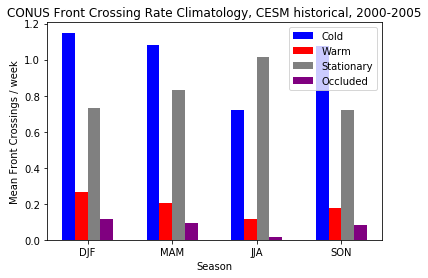

In [9]:
# plot front rates by type
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, cesm_hist_srates_clim_CONUS_mean_wk[:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, cesm_hist_srates_clim_CONUS_mean_wk[:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, cesm_hist_srates_clim_CONUS_mean_wk[:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, cesm_hist_srates_clim_CONUS_mean_wk[:,3], width=w, label="Occluded", color='purple')

ax.set_title('CONUS Front Crossing Rate Climatology, CESM historical, 2000-2005')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

#plt.savefig('../figures/cesm_hist_srates_clim_CONUS_mean_wk.png')

## CESM continuation: RCP2.6, 2006-2015

In [10]:
cesm_rcp_rates_file = "cesm_frontRates_2006-2015.nc"

In [11]:
cesm_rcp_rates_fronts = xr.open_dataset(cesm_file_path+cesm_rcp_rates_file)

In [12]:
cesm_rcp_srates_clim = cesm_rcp_rates_fronts.seasonal_rate_climatology
cesm_rcp_srates_clim_CONUS = cesm_rcp_srates_clim.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
cesm_rcp_srates_clim_CONUS_mean_wk = cesm_rcp_srates_clim_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

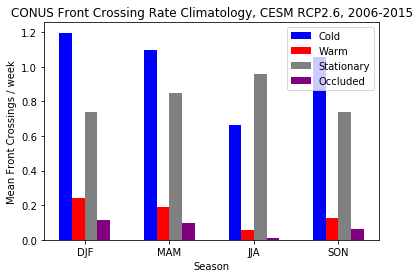

In [13]:
# plot front rates by type
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, cesm_rcp_srates_clim_CONUS_mean_wk[:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, cesm_rcp_srates_clim_CONUS_mean_wk[:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, cesm_rcp_srates_clim_CONUS_mean_wk[:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, cesm_rcp_srates_clim_CONUS_mean_wk[:,3], width=w, label="Occluded", color='purple')

ax.set_title('CONUS Front Crossing Rate Climatology, CESM RCP2.6, 2006-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

#plt.savefig('../figures/cesm_rcp_srates_clim_CONUS_mean_wk.png')

## Validation data: Coded Surface Bulletin fronts

In [99]:
csb_file_path = "/glade/work/kdagon/ML-extremes/data/CODSUS/MERRA2/"
csb_rates_file = "codsus_frontRates_2003-2015.nc" # unmasked version to compare with CESM/MERRA
#csb_rates_file = "codsus_masked_frontRates_2003-2015.nc" # masked version to compare with Jim's analysis
# NOTE: masking is really just cutting out extreme SW US which doesn't have that many fronts anyway, so the CONUS averages should look similar for CSB masked/unmasked
#csb_rates_file = "codsus_1wide_frontRates_2003-2015.nc" # testing the 1wide version - makes a big difference!

In [100]:
csb_rates_fronts = xr.open_dataset(csb_file_path+csb_rates_file)

In [101]:
csb_srates_clim = csb_rates_fronts.seasonal_rate_climatology

In [102]:
# approx. lat/lon here to get a CONUS rectangular region
csb_srates_clim_CONUS = csb_srates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons

In [103]:
csb_srates_clim_CONUS_mean_wk = csb_srates_clim_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

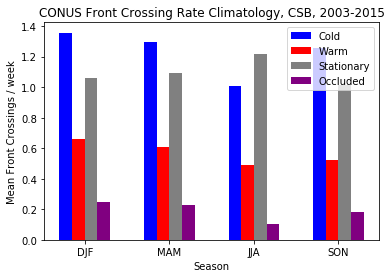

In [72]:
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,3], width=w, label="Occluded", color='purple')

ax.set_title('CONUS Front Crossing Rate Climatology, CSB, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

#plt.savefig('../figures/csb_srates_clim_CONUS_mean_wk.png')
#plt.savefig('../figures/csb_masked_srates_clim_CONUS_mean_wk.png')
#plt.savefig('../figures/csb_1wide_srates_clim_CONUS_mean_wk.png')

## Combine CESM output 2003-2015 to compare with the same obs years

In [20]:
cesm_rates_file = "cesm_frontRates_2003-2015.nc"
cesm_rates_fronts = xr.open_dataset(cesm_file_path+cesm_rates_file)

In [21]:
cesm_srates_clim = cesm_rates_fronts.seasonal_rate_climatology
cesm_srates_clim_CONUS = cesm_srates_clim.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
cesm_srates_clim_CONUS_mean_wk = cesm_srates_clim_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

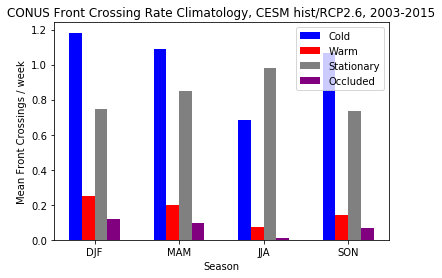

In [22]:
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, cesm_srates_clim_CONUS_mean_wk [:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, cesm_srates_clim_CONUS_mean_wk [:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, cesm_srates_clim_CONUS_mean_wk [:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, cesm_srates_clim_CONUS_mean_wk [:,3], width=w, label="Occluded", color='purple')

ax.set_title('CONUS Front Crossing Rate Climatology, CESM hist/RCP2.6, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

#plt.savefig('../figures/cesm_srates_clim_CONUS_mean_wk.png')

## Compare CESM / CSB, 2003-2015

In [26]:
# standard deviation across fronts for each season (to get error bars?)
np.std(cesm_srates_clim_CONUS_mean_wk[:,:4], axis=1)

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([0.4215877 , 0.4216918 , 0.40947577, 0.41602787], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
Dimensions without coordinates: seasons4

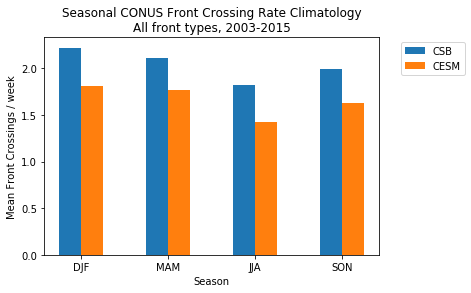

In [110]:
fig, ax = plt.subplots()

w = 0.25
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
# summing across the first 4 front indices does not equal the 5th index (front/no-front)
#ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CSB", color='C0')
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,4], width=w, label="CSB", color='C0')
position = x + (w/2)
#ax.bar(position, cesm_srates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CESM", color='C1')
ax.bar(position, cesm_srates_clim_CONUS_mean_wk[:,4], width=w, label="CESM", color='C1')

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));
#plt.savefig('srates_clim_CONUS_CSB_CESM_2003-2005.pdf', bbox_inches='tight')
#plt.savefig('../figures/csb_cesm_srates_clim_CONUS_mean_wk.png', bbox_inches='tight')

### TO DO: I think I need to generate the CESM rates file via polylines for this to be a fair comparison to CSB?
### TO DO: figure out 1wide vs. 3wide usage (changes results)

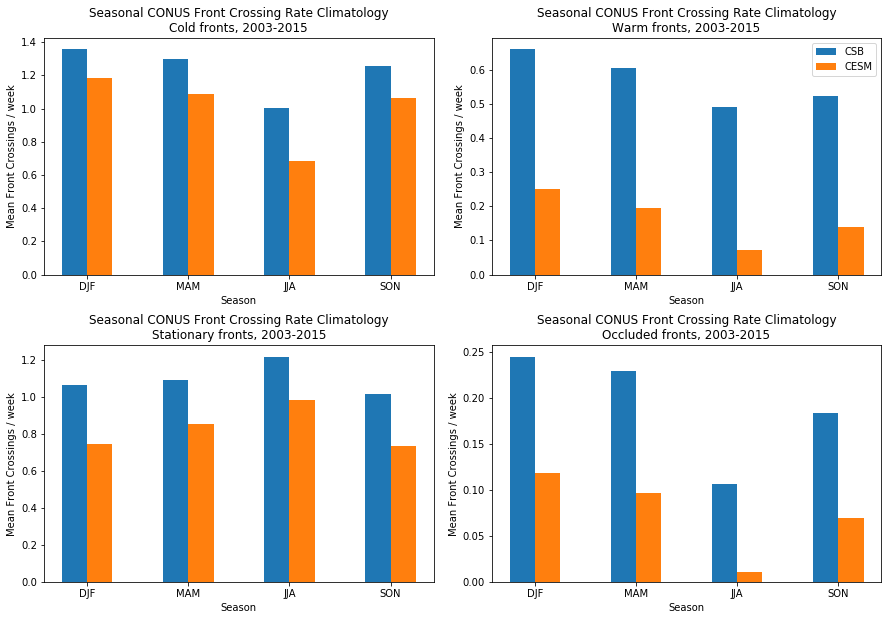

In [111]:
# by front type
frontstrings = ('Cold', 'Warm', 'Stationary', 'Occluded')
nfronts = len(frontstrings)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.ravel()

for i in range(nfronts):
    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax[i].bar(position, csb_srates_clim_CONUS_mean_wk[:,i], width=w, label="CSB", color='C0')
    position = x + (w/2)
    ax[i].bar(position, cesm_srates_clim_CONUS_mean_wk[:,i], width=w, label="CESM", color='C1')

    ax[i].set_title('Seasonal CONUS Front Crossing Rate Climatology\n'+frontstrings[i]+' fronts, 2003-2015')
    ax[i].set_ylabel('Mean Front Crossings / week')
    ax[i].set_xlabel('Season')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)

    if i==1:
        ax[i].legend();
        
plt.subplots_adjust(wspace=0.15, hspace=0.3)
#plt.savefig('srates_clim_CONUS_CSB_CESM_2003-2005_byfronttype.pdf', bbox_inches='tight')
#plt.savefig('../figures/csb_cesm_srates_clim_CONUS_mean_wk_byfronttype.png')

## Monthly rate climatology

In [40]:
cesm_mrates_clim = cesm_rates_fronts.monthly_rate_climatology

In [41]:
cesm_mrates_clim_CONUS_mean_wk = cesm_mrates_clim.sel(lat=slice(26,50), lon=slice(235,292)).mean(("lon","lat"))*7

In [104]:
csb_mrates_clim = csb_rates_fronts.monthly_rate_climatology

In [105]:
csb_mrates_clim_CONUS_mean_wk = csb_mrates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)).mean(("lon","lat"))*7

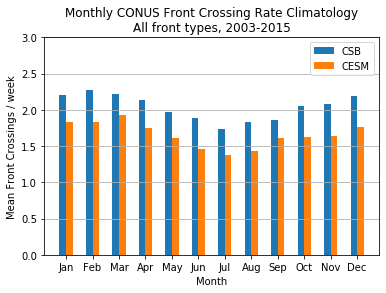

In [75]:
fig, ax = plt.subplots()

w = 0.25
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
#ax.bar(position, csb_mrates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CSB", color='C0')
ax.bar(position, csb_mrates_clim_CONUS_mean_wk[:,4], width=w, label="CSB", color='C0')
position = x + (w/2)
#ax.bar(position, cesm_mrates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CESM", color='C1')
ax.bar(position, cesm_mrates_clim_CONUS_mean_wk[:,4], width=w, label="CESM", color='C1')

ax.set_title('Monthly CONUS Front Crossing Rate Climatology\nAll front types, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

# settings to better compare to Jim's paper
ax.set_ylim(0,3)
plt.grid(True, axis='y')

#plt.savefig('../figures/csb_cesm_mrates_clim_CONUS_mean_wk.png')
#plt.savefig('../figures/csb_masked_cesm_mrates_clim_CONUS_mean_wk.png')

## Spatial Maps of Seasonal Climatology

In [76]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib import cm

In [121]:
cesm_srates_clim_wk = cesm_srates_clim*7
cesm_srates_clim_CONUS_wk = cesm_srates_clim_CONUS*7

In [71]:
# indexing for all fronts
#cesm_srates_clim_wk[:,4,:,:]

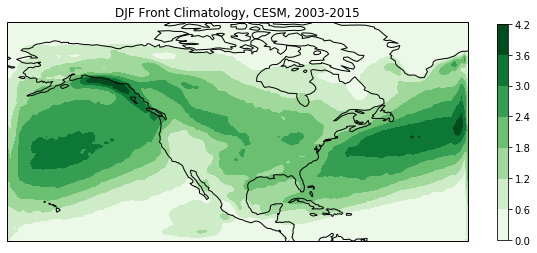

In [113]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())

# start with the first season (DJF)
field, lon = add_cyclic_point(cesm_srates_clim_wk[0,4,:,:], coord=cesm_srates_clim.lon)
lat = cesm_srates_clim.lat

cf = ax.contourf(lon, lat, field, vmin=0, vmax=4, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
ax.set_title('DJF Front Climatology, CESM, 2003-2015')
ax.coastlines()

plt.colorbar(cf, shrink=0.5);

In [106]:
csb_srates_clim_wk = csb_srates_clim*7
csb_srates_clim_CONUS_wk = csb_srates_clim_CONUS*7

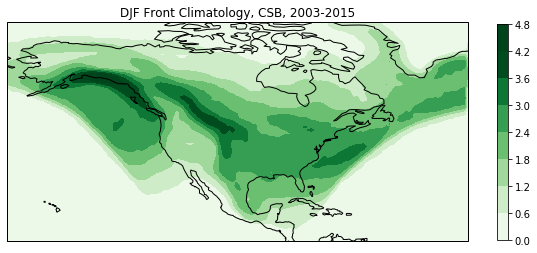

In [119]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())

# start with the first season (DJF)
field, lon = add_cyclic_point(csb_srates_clim_wk[0,4,:,:], coord=csb_srates_clim.lon)
lat = csb_srates_clim.lat

cf = ax.contourf(lon, lat, field, vmin=0, vmax=4, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
ax.set_title('DJF Front Climatology, CSB, 2003-2015')
ax.coastlines()

plt.colorbar(cf, shrink=0.5);

# compare masked and unmasked CSB data to see the difference spatially
#plt.savefig('../figures/csb_srates_clim_DJF.png')
#plt.savefig('../figures/csb_masked_srates_clim_DJF.png')

In [114]:
import matplotlib as mpl

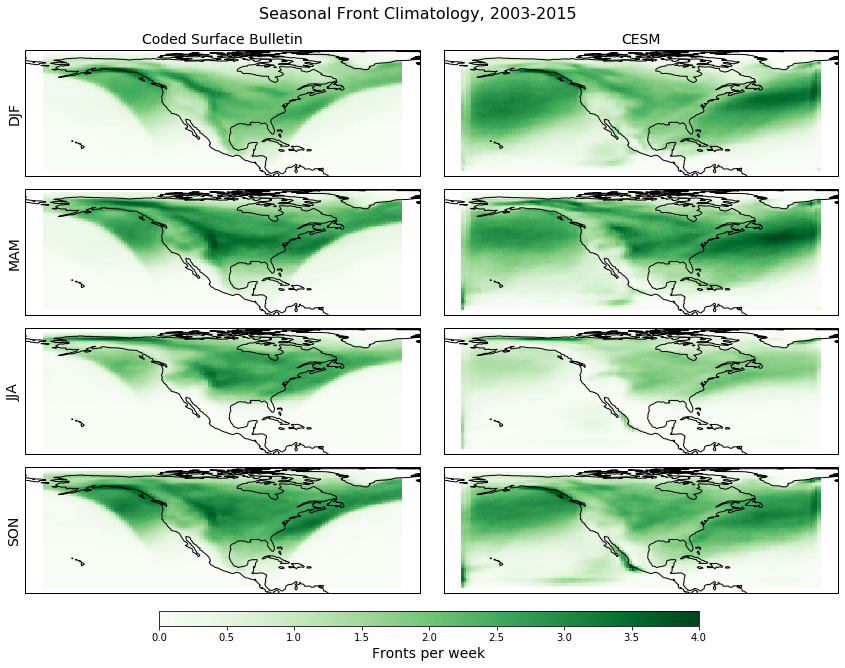

In [118]:
# by season type
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertCylindrical()})
#axs = axs.ravel()

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin', fontsize=14) 
    field, lon = add_cyclic_point(csb_srates_clim_wk[i,4,:,:], coord=csb_srates_clim.lon)
    lat = csb_srates_clim.lat
    #cf = axs[i,0].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) 
    cf = axs[i,0].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,0].coastlines()
    # can't get ylabels to work?
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2003-2015', fontsize=16, y=0.94)

    
for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM', fontsize=14)
    field, lon = add_cyclic_point(cesm_srates_clim_wk[i,4,:,:], coord=cesm_srates_clim.lon)
    lat = cesm_srates_clim.lat
    #cf = axs[i,1].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree())
    cf = axs[i,1].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,1].coastlines()
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
cmap = mpl.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('srates_clim_CSB_CESM_2003-2005_lambert.pdf', bbox_inches='tight')

looks like it's the polyline method that's causing the stippling on the CESM filled coutour plots (grid issue?)

In [127]:
import cartopy.feature as cfeature

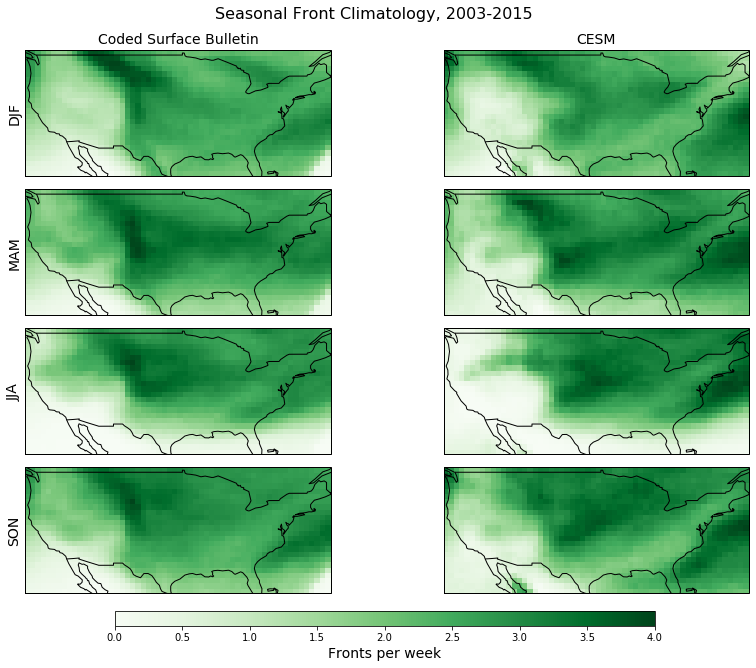

In [146]:
# by season type and trim domain to CONUS
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()})
#fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertCylindrical()})
#fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertConformal()}) # some of these may not be ideal for a region (the way I've subset anyway)
#fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.Robinson()})
#axs = axs.ravel()

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin', fontsize=14) 
    field, lon = add_cyclic_point(csb_srates_clim_CONUS_wk[i,4,:,:], coord=csb_srates_clim_CONUS.lon)
    lat = csb_srates_clim_CONUS.lat
    #cf = axs[i,0].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) 
    #cf = axs[i,0].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation, but pcolormesh adds a white border
    cf = axs[i,0].pcolor(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of the white border, does slow down a bit
    # see also: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html#differences-pcolor-pcolormesh
    axs[i,0].coastlines()
    axs[i,0].add_feature(cfeature.BORDERS)
    #axs[i,0].add_feature(cfeature.STATES)
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2003-2015', fontsize=16, y=0.94)

    
for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM', fontsize=14)
    field, lon = add_cyclic_point(cesm_srates_clim_CONUS_wk[i,4,:,:], coord=cesm_srates_clim_CONUS.lon)
    lat = cesm_srates_clim_CONUS.lat
    #cf = axs[i,1].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree())
    #cf = axs[i,1].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree())
    cf = axs[i,1].pcolor(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree())
    axs[i,1].coastlines()
    axs[i,1].add_feature(cfeature.BORDERS)
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
cmap = mpl.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('srates_clim_CSB_CESM_2003-2005_lambert.pdf', bbox_inches='tight')
#plt.savefig('../figures/csb_cesm_srates_clim_CONUS.png')